<a href="https://colab.research.google.com/github/anpaschool/deep-learning/blob/master/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Net in TensorFlow 2.0

For classifying MNIST digits. 

_Remember to change your Runtime to GPU or TPU._

#### Intall Tensorflow

In [26]:
#pip install tensorflow==2.0.0-beta0
#pip install --upgrade tensorflow==2.0.0-beta0

In [27]:
import tensorflow as tf
import seaborn as sns
from tensorflow import keras

In [28]:
!pip freeze | grep tensorflow

tensorflow==2.0.0b0
tensorflow-estimator==1.13.0


#### Load data

In [36]:
(X_train, y_train), (X_valid, y_valid) = keras.datasets.mnist.load_data()

##### What are the shape of the data?

In [37]:
print(X_train.shape, y_train.shape,X_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


- There are 60,000 Train data which are 28 by 28 pixcel images and 
- There are 10,000 Train data which are also 28 by 28 pixcel images

#### Data Visualization

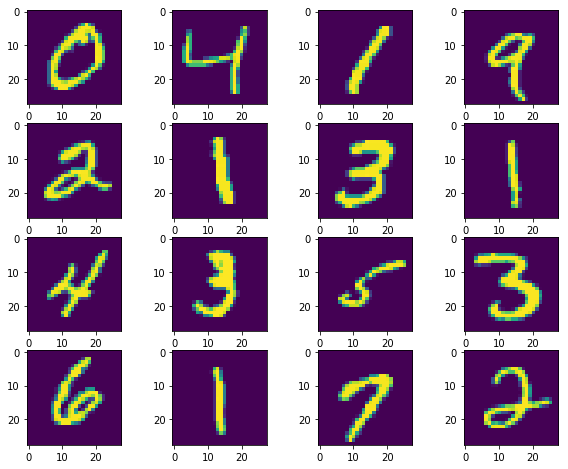

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = [10,8])
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X_train[i].reshape(28,28))
plt.show()

In [40]:
y_train[1:17]

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2], dtype=uint8)

#### Preprocess data

We flaten the data (from 28 by 28 to 784) before it is feed into the model. We can also create a layer as a front layer to perform this flattening step.

In [42]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

#### Data Normalization
This step converts the pixcel value ranging from 0 to 255 into 0 to 1.

In [43]:
X_train /= 255
X_valid /= 255

#### Prepare Labels
We convert label 1,2,3,4,5,6,7,8,9 in label vectors

In [44]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [45]:
y_train[1:16]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

#### Design neural network architecture

After the pixels are flattened, the network consists of a sequence of two ```tf.keras.layers.Dense``` layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 64 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

```
model
   = keras.models.sequential([
       keras.layer.layerType(parameters...),
       keras.layer.layerType(parameters...),
       keras.layer.layerType(parameters...),
       keras.layer.layerType(parameters...)
   ])  
```

In [12]:
model = keras.models.Sequential([
    
    
    keras.layers.Dense(64,\
                       activation='sigmoid',\
                       input_shape=(784,)),
    
    keras.layers.Dense(10,\
                       activation='softmax')
    
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [47]:
(784*64)+ 64, (64*10)+10

(50240, 650)

#### Configure model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- ```Loss function``` —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- ```Optimizer``` —This is how the model is updated based on the data it sees and its loss function.
- ```Metrics``` —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [54]:
model.compile(loss='categorical_crossentropy',\
              optimizer='adam',\
              metrics=['accuracy'])

#### Train!

Training the neural network model requires the following steps:

- Feed the training data to the model. In this example, the training data is in the ```train_images``` and ```train_labels``` arrays.
- The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the ```test_images``` array. Verify that the predictions match the labels from the ```test_labels``` array.
- To start training, call the ```model.fit``` method—so called because it "fits" the model to the training data:

In [55]:
model.fit(X_train, y_train,\
          batch_size=128,\
          epochs=10,\
          verbose=1,\
          validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4402 - accuracy: 0.8704 - val_loss: 0.1899 - val_accuracy: 0.9444
Epoch 2/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.1626 - accuracy: 0.9528 - val_loss: 0.1340 - val_accuracy: 0.9605
Epoch 3/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.1206 - accuracy: 0.9646 - val_loss: 0.1196 - val_accuracy: 0.9655
Epoch 4/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0982 - accuracy: 0.9705 - val_loss: 0.1014 - val_accuracy: 0.9705
Epoch 5/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0834 - accuracy: 0.9751 - val_loss: 0.0997 - val_accuracy: 0.9697
Epoch 6/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0714 - accuracy: 0.9780 - val_loss: 0.0939 - val_accuracy: 0.9719
Epoch 7/10
60000/60000 [==============================] 

#### Performing Inference

In [56]:
valid_0 = X_valid[0].reshape(1, 784)

In [57]:
model.predict(valid_0)

array([[2.8813774e-09, 3.8345047e-10, 1.1818415e-04, 2.0551306e-06,
        2.2122413e-11, 1.7986340e-09, 1.0651025e-13, 9.9987960e-01,
        1.7287803e-08, 1.0190855e-07]], dtype=float32)

In [58]:
model.predict_classes(valid_0)

array([7])

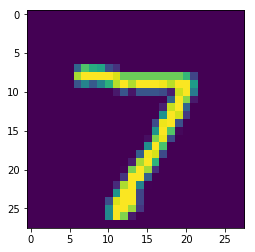

In [59]:
plt.imshow(valid_0.reshape(28,28))